In [ ]:
# don't run this ver, run the one in svd repo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/pio/scratch/1/i313924/OPUS/funk-svd/')
import funk_svd_mod
from sklearn.decomposition import PCA
from scipy import spatial
from tqdm.auto import tqdm

In [2]:
model = pd.read_pickle('/pio/scratch/1/i313924/data/svd_data/model_100_epochs_regularized_error.pkl')

## ABX

In [3]:
abx_tests = pd.read_json('/pio/scratch/1/i313924/data/test_data/test_ABX_weighted_slim.json', lines=True)

In [4]:
def get_item_embedding(model, asin):
    item_id = model.item_mapping_[asin]
    return model.qi_[item_id]

In [5]:
A = np.zeros((10000, 100))
B = np.zeros((10000, 100))
X = np.zeros((10000, 100))

In [6]:
for i, test in tqdm(abx_tests.iterrows()):
    A[i, :] = get_item_embedding(model, test["A"])
    B[i, :] = get_item_embedding(model, test["B"])
    X[i, :] = get_item_embedding(model, test["X"])

0it [00:00, ?it/s]

In [7]:
dist_A = ((A - X)**2).sum(axis=1)
dist_B = ((B - X)**2).sum(axis=1)

In [8]:
(dist_A < dist_B).mean()

0.4989

In [9]:
cos_dist_A = np.zeros(10000)
cos_dist_B = np.zeros(10000)
for i in tqdm(range(10000)):
    cos_dist_A[i] = spatial.distance.cosine(A[i, :], X[i, :])
    cos_dist_B[i] = spatial.distance.cosine(B[i, :], X[i, :])

  0%|          | 0/10000 [00:00<?, ?it/s]

In [10]:
(cos_dist_A < cos_dist_B).mean()

0.4981

## Embeddings PCA

In [11]:
item_embeddings = pd.DataFrame(model.qi_)
user_embeddings = pd.DataFrame(model.pu_)

In [12]:
item_embeddings 

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.071700,0.155233,-0.035075,0.039132,0.021511,-0.157339,-0.109691,0.056212,-0.052581,-0.126665,...,-0.113045,0.188055,-0.105923,0.054549,0.115000,0.040604,-0.033000,0.020790,0.052905,0.022506
1,0.014415,-0.039023,0.116728,0.009538,0.018332,0.040684,-0.085491,-0.046740,0.009304,-0.131506,...,0.050206,0.112564,-0.031487,-0.003846,0.028095,0.146170,-0.073819,-0.007597,-0.118739,-0.036019
2,-0.000762,-0.067305,0.028756,-0.030212,-0.040217,0.088145,-0.024214,-0.032425,0.017364,0.052617,...,-0.062520,-0.081154,-0.011277,-0.058419,0.170066,-0.154808,0.048737,-0.025463,-0.098752,0.066510
3,-0.256457,-0.009459,0.109080,0.171563,0.041558,-0.220063,-0.018368,-0.026588,0.060343,0.107952,...,0.214861,-0.070190,0.206015,-0.039413,-0.026867,0.176159,-0.061917,-0.119700,0.063405,0.052475
4,-0.082862,-0.077750,-0.080021,0.074503,0.014288,0.017996,-0.030411,-0.010427,-0.036171,0.080745,...,-0.006484,-0.079976,-0.139826,0.123863,0.020631,0.125281,-0.076876,-0.001824,-0.005705,0.003514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206491,-0.038534,-0.121764,-0.066068,-0.165623,-0.002116,-0.015160,-0.089690,0.049364,-0.031468,-0.250325,...,0.009681,0.110898,-0.090437,0.034940,0.044581,-0.014042,0.055142,0.225837,0.063689,0.056338
206492,0.118741,0.100617,0.137172,-0.081325,0.108239,-0.020416,-0.016452,0.069622,-0.139268,0.016702,...,0.020291,-0.144455,0.035553,-0.001455,-0.053582,-0.026394,-0.021796,0.077080,0.017106,-0.073823
206493,-0.000879,-0.008664,-0.043201,0.078890,0.110874,-0.047014,-0.119817,-0.086180,0.006027,-0.097776,...,0.007056,-0.218394,0.044984,0.016597,0.088289,0.045266,0.048168,0.055464,0.057779,-0.061083
206494,0.170837,0.083946,0.014785,-0.048914,-0.011201,0.030836,-0.005847,0.123656,-0.056542,0.128551,...,0.151213,-0.135546,-0.029846,-0.044357,-0.120225,0.198132,0.159665,-0.016847,0.180823,0.054823


In [13]:
embeddings = pd.concat([item_embeddings, user_embeddings], keys=['items', 'users'])

In [14]:
pca = PCA(n_components=2)
pca.fit(embeddings)

PCA(n_components=2)

In [15]:
reduced_item_embeddings = pd.DataFrame(pca.transform(embeddings.loc["items"]))
reduced_user_embeddings = pd.DataFrame(pca.transform(embeddings.loc["users"]))

In [16]:
reduced_item_embeddings

,0,1
0,0.069006,0.025787
1,-0.062768,0.071180
2,0.060782,0.200356
3,-0.094914,-0.101432
4,0.095477,-0.048006
...,...,...
206491,-0.025181,0.109297
206492,0.084188,0.010698
206493,-0.086728,-0.065691
206494,0.016973,0.024854


In [17]:
reduced_user_embeddings

,0,1
0,0.020790,0.071950
1,-0.009235,-0.010218
2,0.142715,0.044651
3,-0.029923,-0.303153
4,-0.061175,-0.057533
...,...,...
101039,0.104896,-0.025598
101040,0.232044,0.059492
101041,-0.023467,0.199274
101042,-0.096004,-0.207643


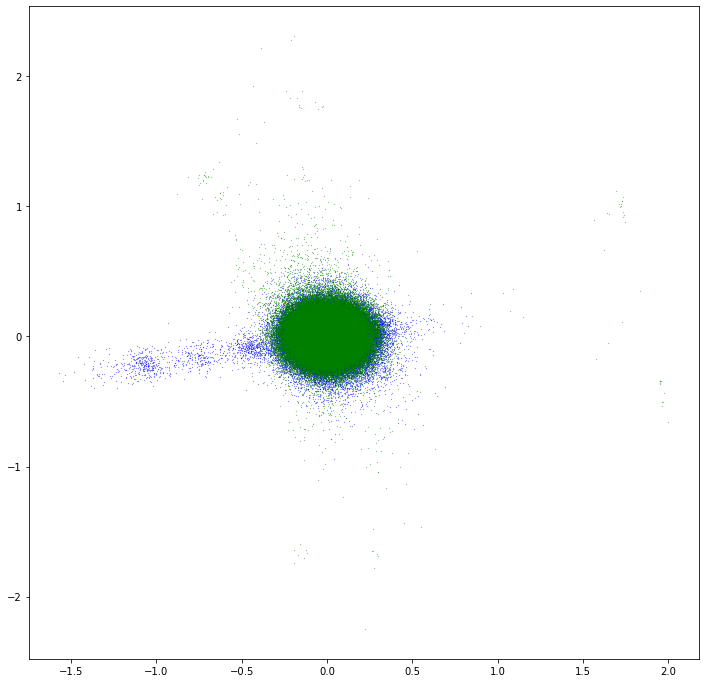

In [18]:
plt.figure(figsize=(12, 12))
plt.scatter(reduced_user_embeddings[0], reduced_user_embeddings[1], c='blue', s=0.03)
plt.scatter(reduced_item_embeddings[0], reduced_item_embeddings[1], c='green', s=0.03)

In [19]:
item_mapping = {v: k for k, v in model.item_mapping_.items()}
user_mapping = {v: k for k, v in model.user_mapping_.items()}

In [20]:
reduced_item_embeddings = reduced_item_embeddings.rename(index=item_mapping)

In [21]:
categories = pd.read_json('/pio/scratch/1/recommender_systems/interim/Amazon/meta_Clothing_Shoes_and_Jewelry_categories.json', lines=True)

In [22]:
reduced_item_embeddings = reduced_item_embeddings.join(categories.set_index('asin'))

In [23]:
reduced_item_embeddings.columns = ['0', '1', 'category_1', 'category_2']

<AxesSubplot:xlabel='0', ylabel='1'>

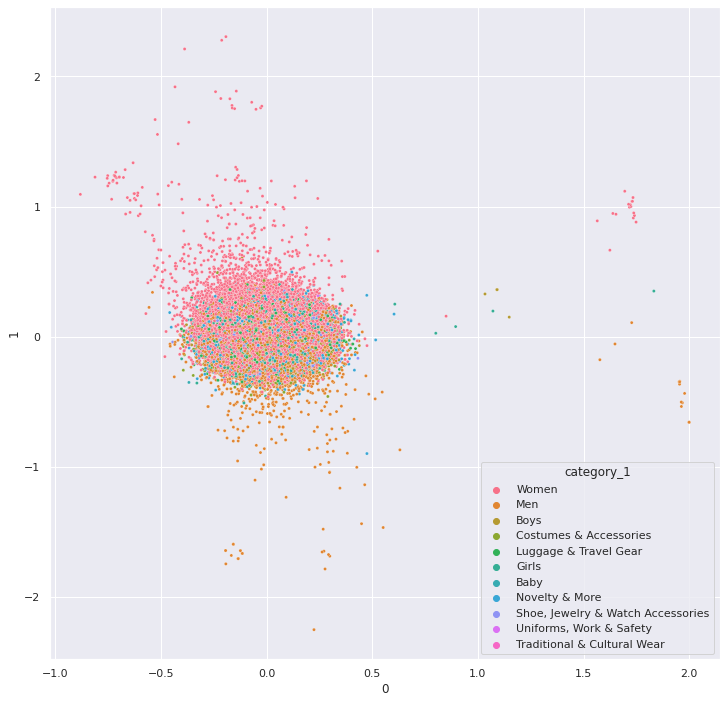

In [24]:
sns.set(rc={'figure.figsize':(12,12)})
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings, hue='category_1', s=10)

<AxesSubplot:xlabel='0', ylabel='1'>

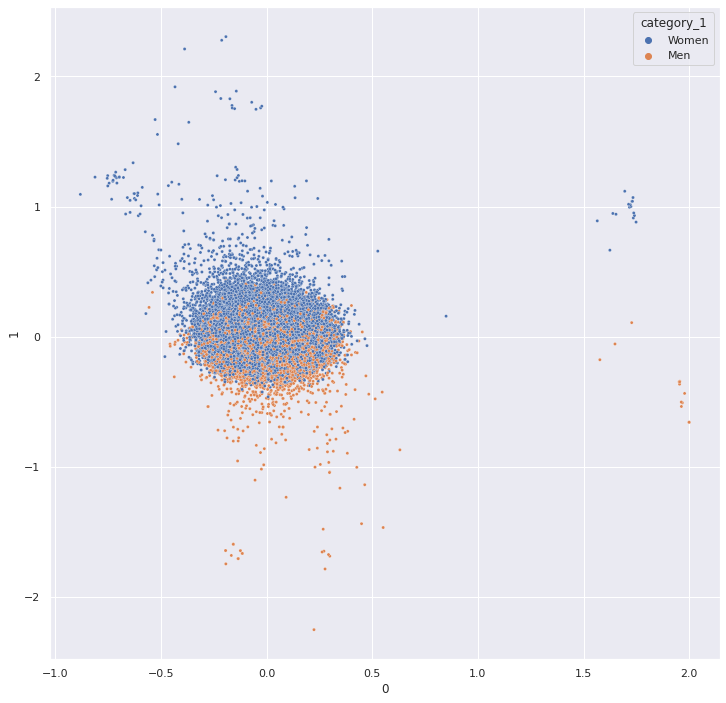

In [25]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(['Women', 'Men'])], hue='category_1', s=10)

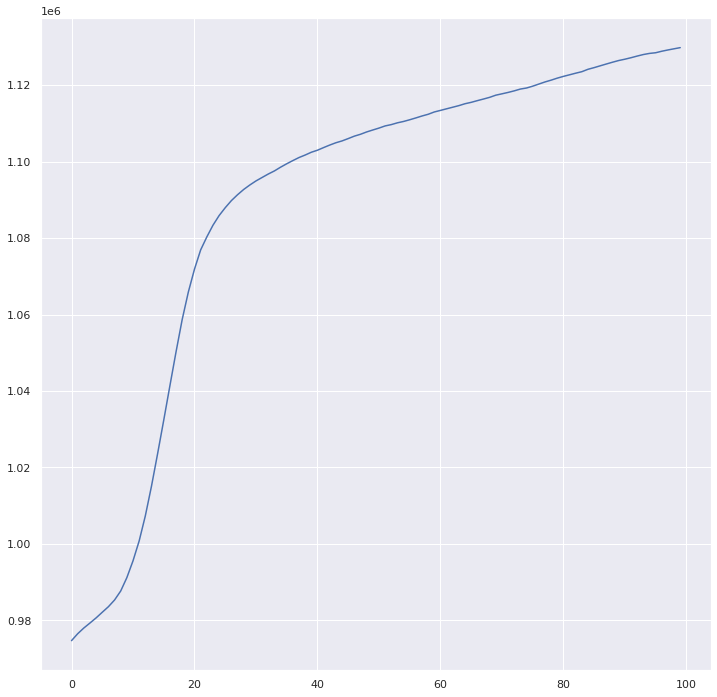

In [26]:
with open('/pio/scratch/1/i313924/data/svd_data/num_regularized_error', 'r') as f_in:
    content = list(map(int, f_in.read().split()))
    plt.plot(content)